We will learn genetic algorithms in this; and we will write an algorirthm for linear regression for least MAE

https://youtu.be/uQj5UNhCPuo?feature=shared


Watch this video first which will help you understand what genetic algorithms are

# Genetic Algorithms

Genetic Algorithms (GAs) are optimization and search techniques inspired by the principles of natural selection and evolution. They are used to solve problems that are difficult or infeasible to address with conventional methods. GAs simulate the process of evolution to evolve solutions over successive iterations.

## Key Concepts in Genetic Algorithms
1. **Population**: A set of candidate solutions to the problem.
2. **Chromosome**: A representation of a candidate solution, often encoded as a string (binary, numeric, or symbolic).
3. **Genes**: The individual components or parameters of a chromosome.
4. **Fitness Function**: A measure of how good a solution is for the given problem.
5. **Selection**: Choosing parent solutions from the population based on their fitness.
6. **Crossover (Recombination)**: Combining parts of two parent chromosomes to create offspring.
7. **Mutation**: Randomly altering genes in a chromosome to maintain genetic diversity.
8. **Elitism**: Retaining the best solutions from one generation to the next to preserve quality.

## How Genetic Algorithms Work
1. **Initialization**: Generate an initial population of candidate solutions randomly or based on some heuristics.
2. **Evaluation**: Assess the fitness of each candidate solution using the fitness function.
3. **Selection**: Choose the most fit individuals for reproduction.
4. **Reproduction**:
   - **Crossover**: Create new individuals by combining features of selected parents.
   - **Mutation**: Introduce small random changes in offspring.
5. **Replacement**: Form a new generation by replacing some or all of the old population with the new one.
6. **Iteration**: Repeat the process until a stopping condition is met (e.g., a satisfactory fitness level or a maximum number of generations).

## Applications of Genetic Algorithms
- **Optimization Problems**: Finding optimal solutions for mathematical, engineering, or financial problems.
- **Machine Learning**: Feature selection, hyperparameter tuning, and neural architecture search.
- **Scheduling**: Solving complex scheduling problems, such as in manufacturing or airline crew assignments.
- **Game Design**: Developing strategies or AI for games.
- **Bioinformatics**: Sequence alignment, protein structure prediction, etc.

Genetic algorithms are particularly useful for problems with large search spaces, non-linear relationships, or multiple conflicting objectives.


In [1227]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [1228]:
# Constants
PARAMETER = 10
LINEAR_REGRESSION_ERROR_RANGE = 3
ERROR_RANGE = 1.0001
MUTATION_RATE = 0.1
NUM_POINTS = 45
NUM_LINES=50
NUM_ELITES = 2  # Number of best lines to retain across generations

In [1229]:

# Function 1: Generate random points along a line with added noise
# This function is already implemented for you.

def generate_random_points(num_points, slope, intercept):
    noise = np.random.normal(0, LINEAR_REGRESSION_ERROR_RANGE, num_points)
    x_coords = np.random.uniform(-PARAMETER, PARAMETER, num_points)
    y_coords = slope * x_coords + intercept + noise

    
    return np.column_stack((x_coords, y_coords))


In [1230]:



def generate_random_lines(num_lines):
    slopes = np.random.uniform(-PARAMETER, PARAMETER, num_lines)
    intercepts = np.random.uniform(-PARAMETER, PARAMETER, num_lines)
    return np.column_stack((slopes, intercepts))




In [1231]:



def calculate_errors(lines, points):
    x_coords = points[:, 0]
    y_coords = points[:, 1]

  
    y_pred = lines[:, 0][:, np.newaxis] * x_coords + lines[:, 1][:, np.newaxis]
    squared_errors = (y_pred - y_coords) ** 2

    error_total = np.sum(squared_errors, axis=1)

    return error_total



In [1232]:


def mutate(line, mutation_rate):
    if np.random.rand() < mutation_rate:
        # Mutate the slope
        line[0] += np.random.uniform(-0.1, 0.1) * line[0]
        line[1] += np.random.uniform(-0.1, 0.1) * line[1]

   
    


In [1233]:
def create_next_generation(lines, points, num_elites=NUM_ELITES, mutation_rate=MUTATION_RATE):
   
    errors = calculate_errors(lines, points)
   
    sorted_indices = np.argsort(errors)  
    
    next_generation = [lines[i] for i in sorted_indices[:num_elites]]
    
    num_offsprings = len(lines) - num_elites
    offsprings = []

    num_offsprings = num_offsprings - num_offsprings % 2 

    for i in range(0, num_offsprings, 2): 
        parent1, parent2 = lines[sorted_indices[i]], lines[sorted_indices[i + 1]]

        offspring1 = np.array([parent1[0], parent2[1]])  
        offspring2 = np.array([parent2[0], parent1[1]]) 
        
        mutate(offspring1, mutation_rate)
        mutate(offspring2, mutation_rate)

        offsprings.append(offspring1)
        offsprings.append(offspring2)

    
    next_generation.extend(offsprings)
    next_generation = np.array(next_generation)

    return next_generation






In [1234]:
# Function 6: Visualization function
# This has been implemented for you

def plot_progress(points, actual_line, predicted_line, generation):
    x = points[:, 0]
    y = points[:, 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data Points", color="blue")
    
    x_fit = np.linspace(min(x), max(x), 100)
    y_actual = actual_line[0] * x_fit + actual_line[1]
    y_predicted = predicted_line[0] * x_fit + predicted_line[1]

    plt.plot(x_fit, y_actual, label="Actual Line", color="green", linewidth=2)
    plt.plot(x_fit, y_predicted, label=f"Predicted Line (Gen {generation})", color="red", linestyle="dashed")
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Genetic Algorithm Progress")
    plt.legend()
    plt.show()
    

In [1235]:
def genetic_algorithm():
    num_points = NUM_POINTS
    true_slope = random.uniform(-PARAMETER, PARAMETER)
    true_intercept = random.uniform(-PARAMETER, PARAMETER)

    test_points = generate_random_points(num_points, true_slope, true_intercept)

    actual_line = np.array([true_slope, true_intercept])

    num_lines = NUM_LINES
    test_lines = generate_random_lines(num_lines)
    generation = test_lines
    best_line = generation[0]
    
    max_generations = 1000
    generation_counter = 0
    
    while generation_counter < max_generations:
        errors = calculate_errors(generation, test_points)
        
        best_idx = np.argmin(errors)
        current_best_error = errors[best_idx]

      
        if current_best_error <= ERROR_RANGE:
            best_line = generation[best_idx]
            print(f"Converged! Best line found at generation {generation_counter}. Error: {current_best_error}")
            plot_progress(test_points, actual_line, best_line, generation_counter)
            break
        
        best_line = generation[best_idx]
        num_elites = NUM_ELITES
    
        generation = create_next_generation(generation, test_points, num_elites)

        if generation_counter % 20 == 0:
            plot_progress(test_points, actual_line, best_line, generation_counter)
        
        generation_counter += 1

    if generation_counter == max_generations:
        print(f"Max generations reached, stopping. Best error: {current_best_error}")


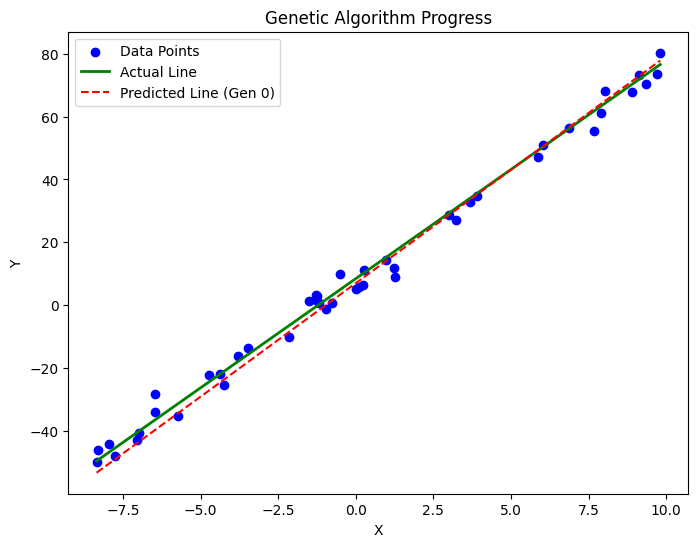

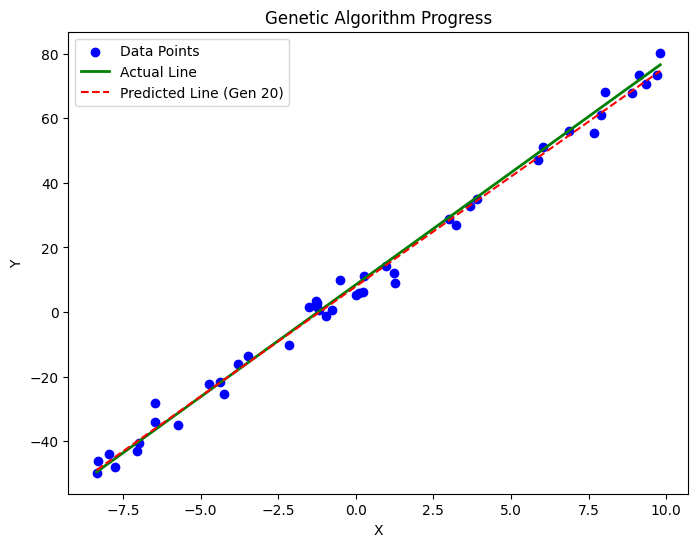

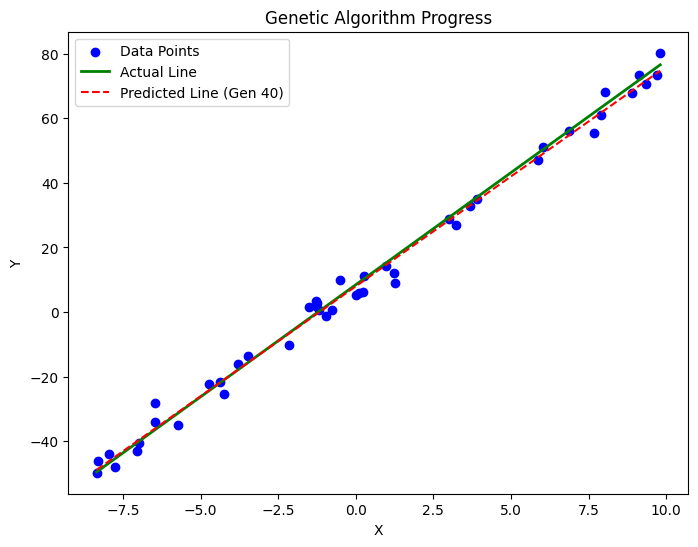

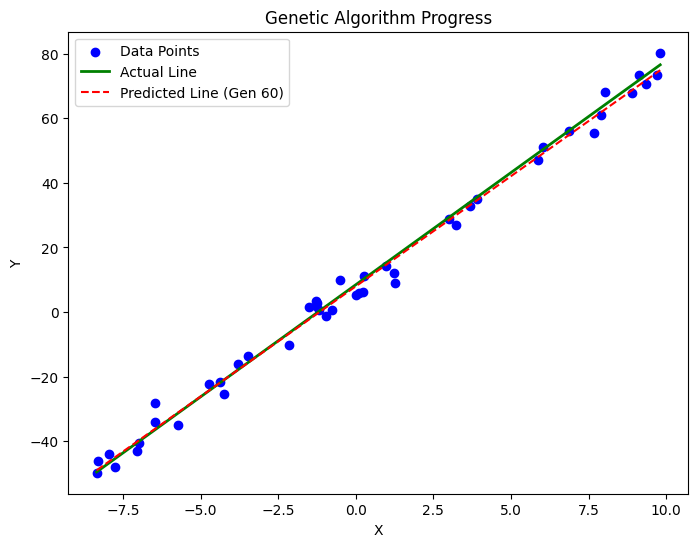

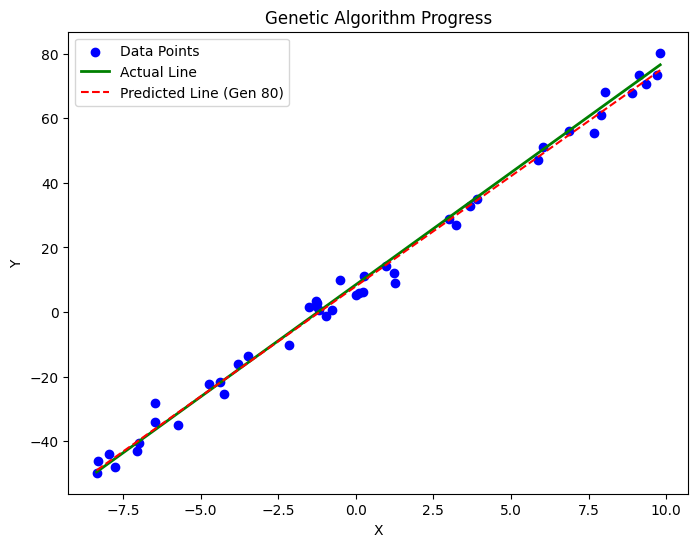

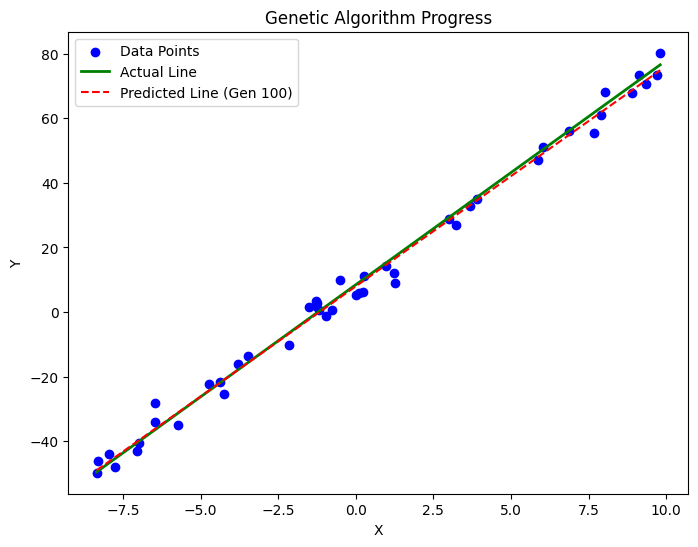

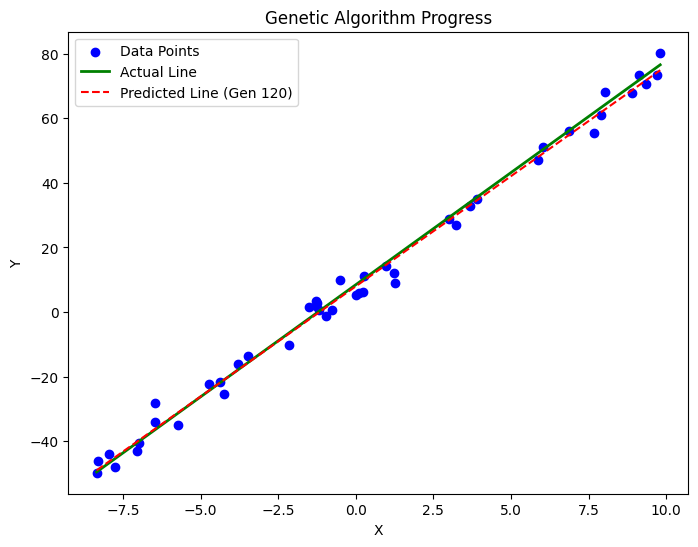

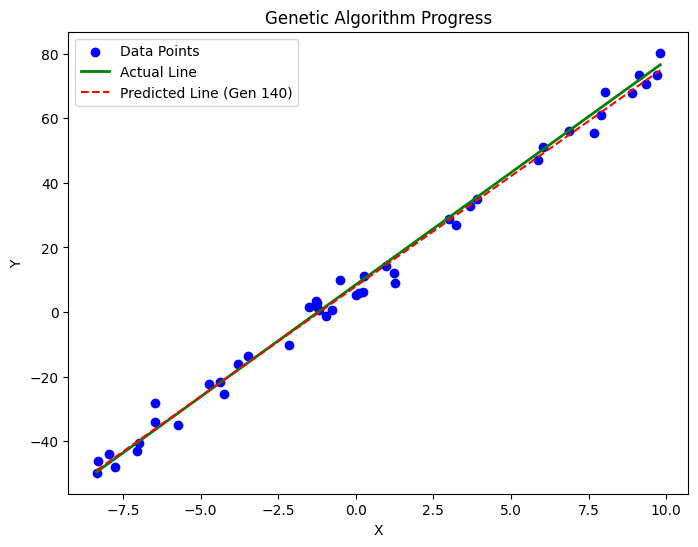

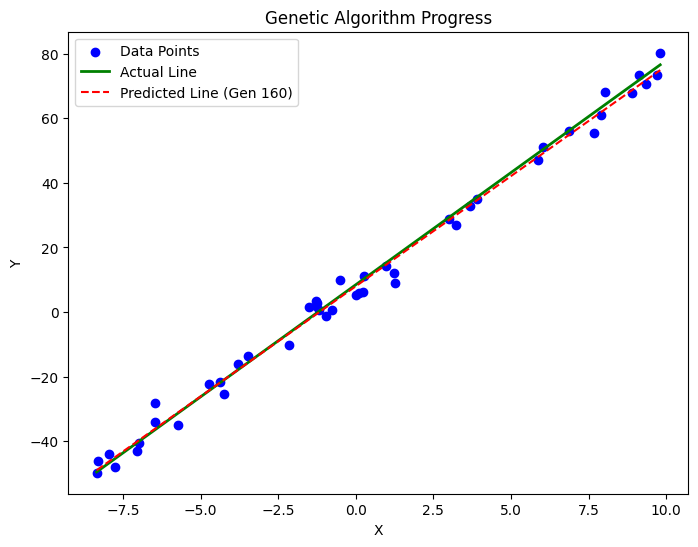

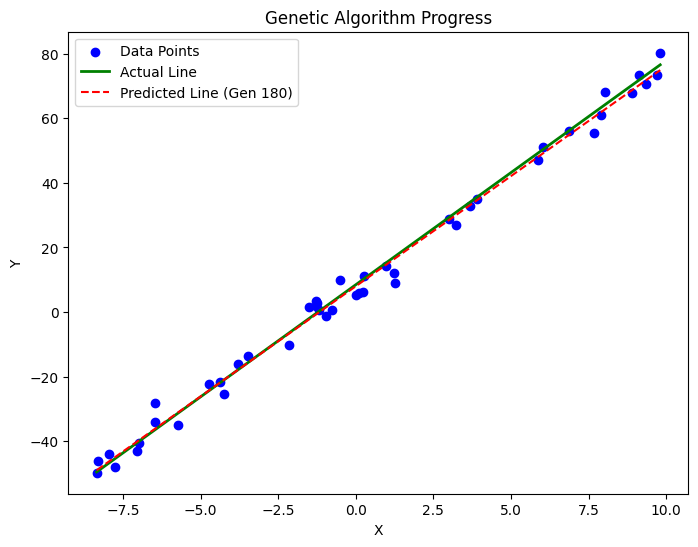

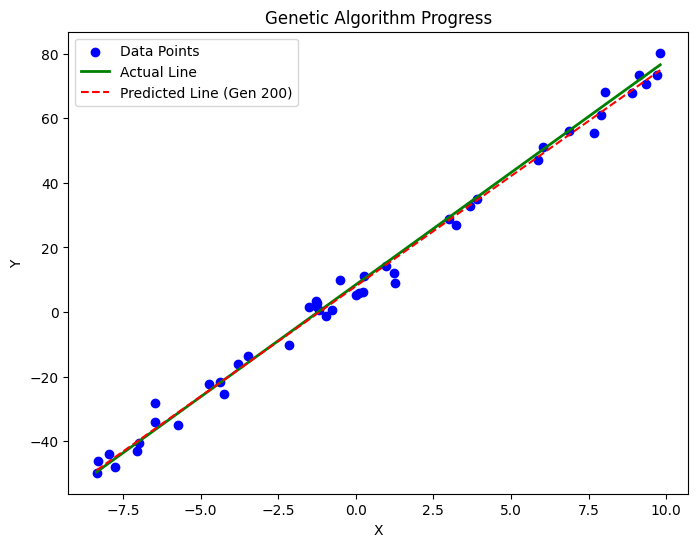

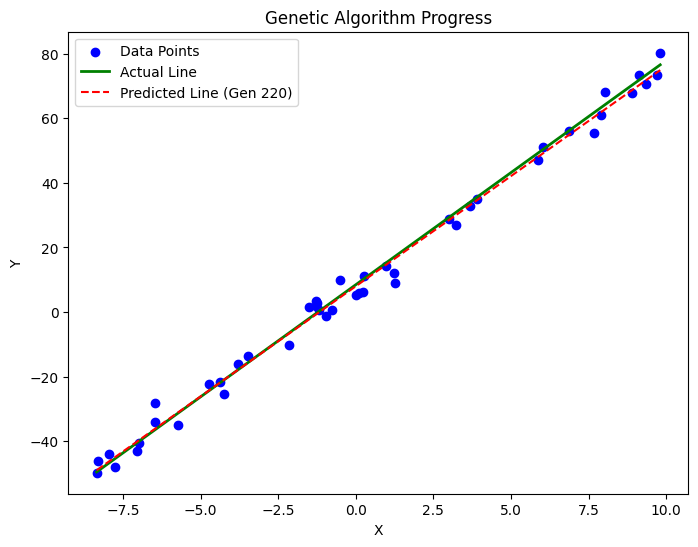

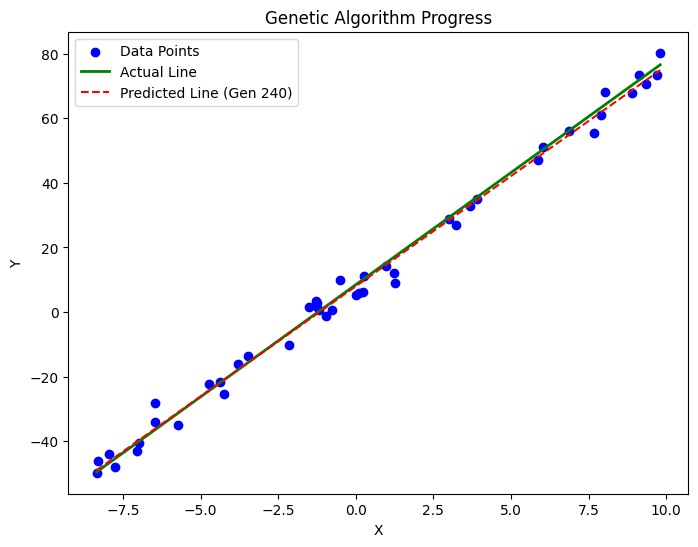

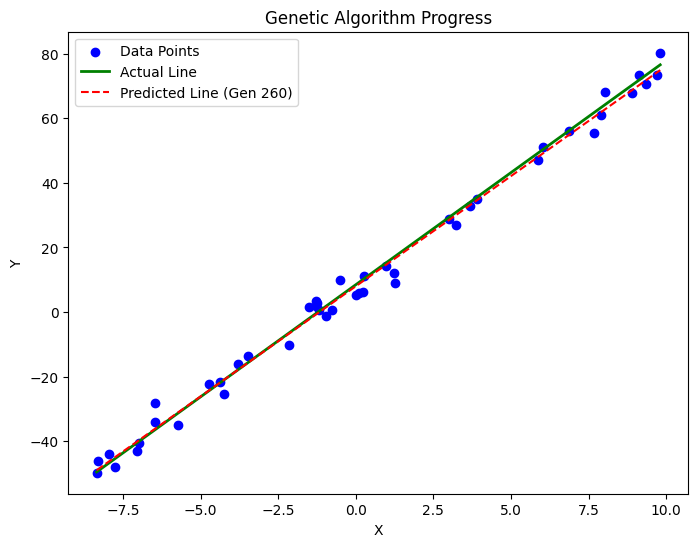

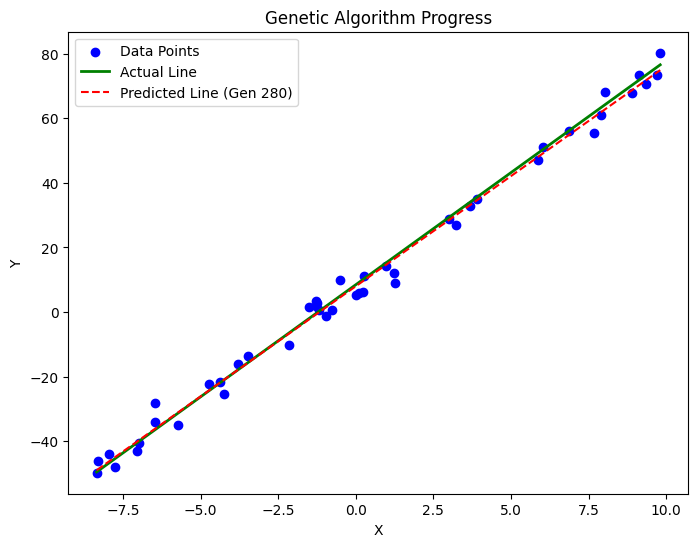

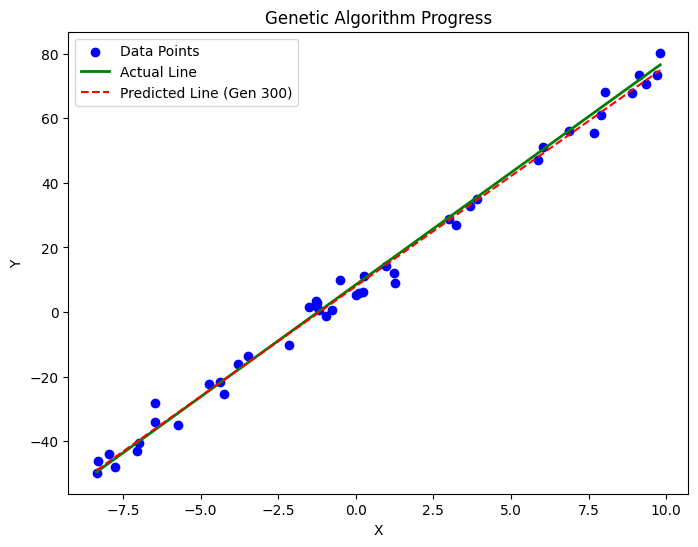

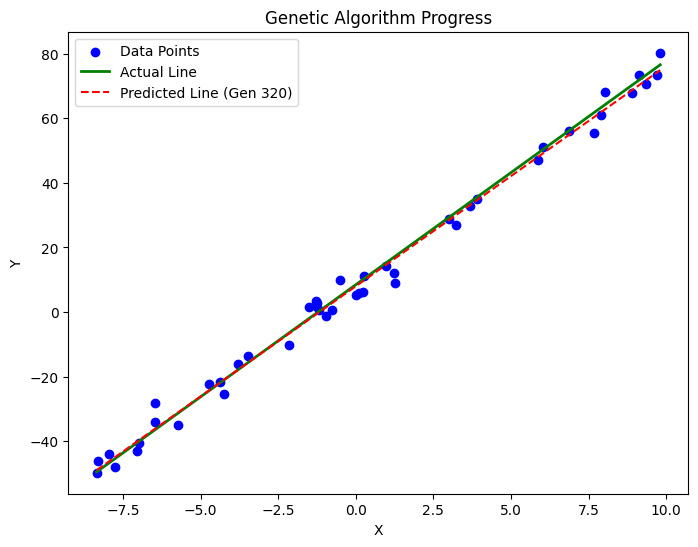

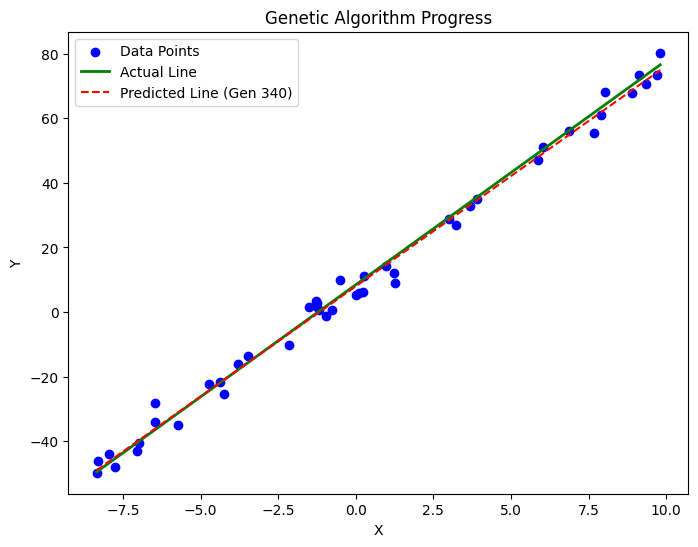

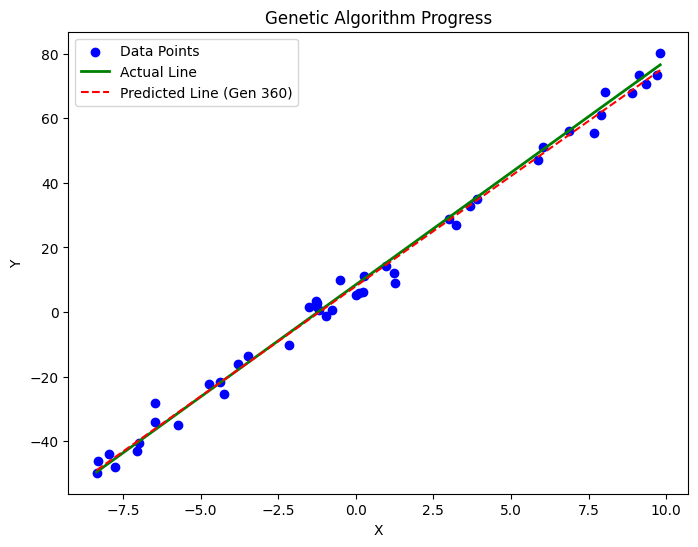

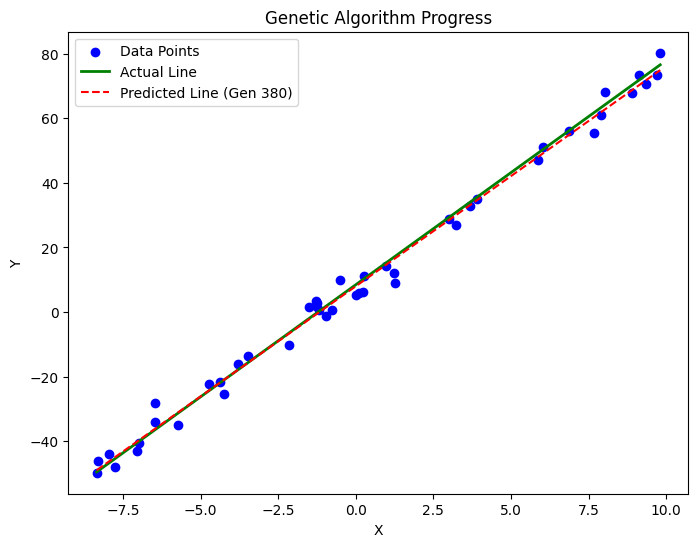

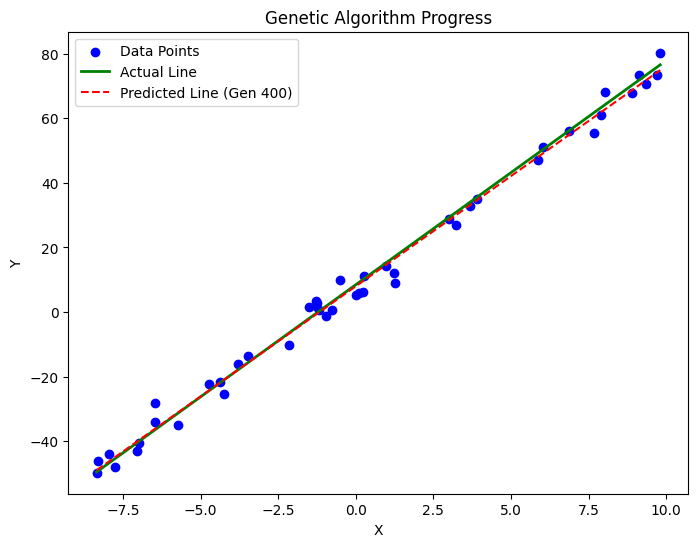

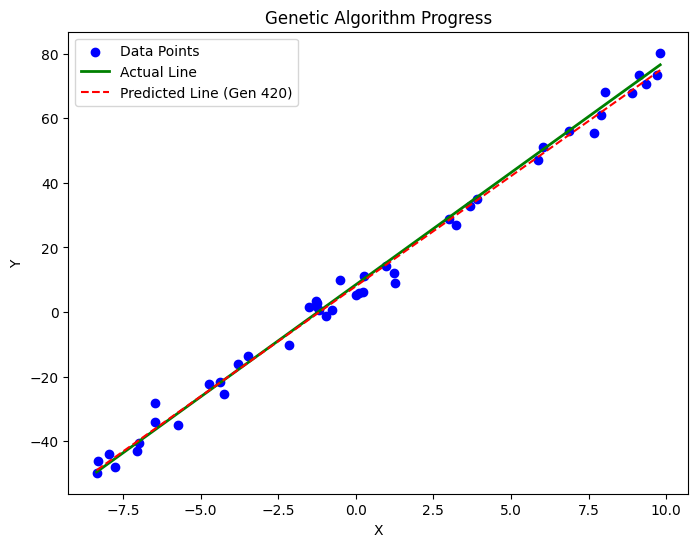

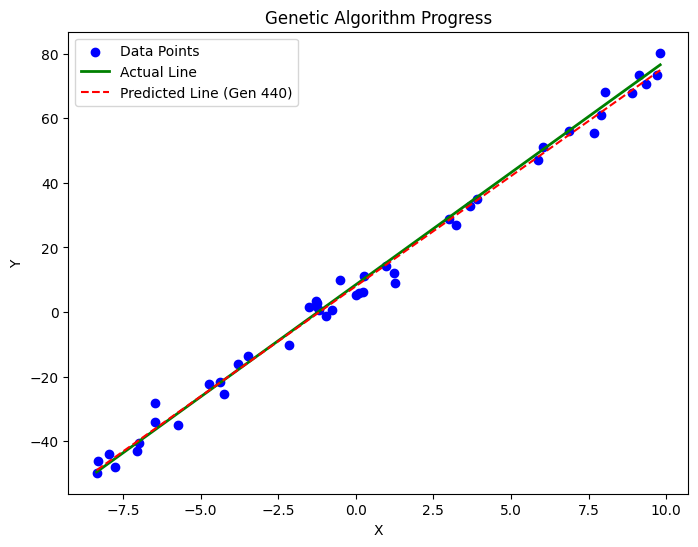

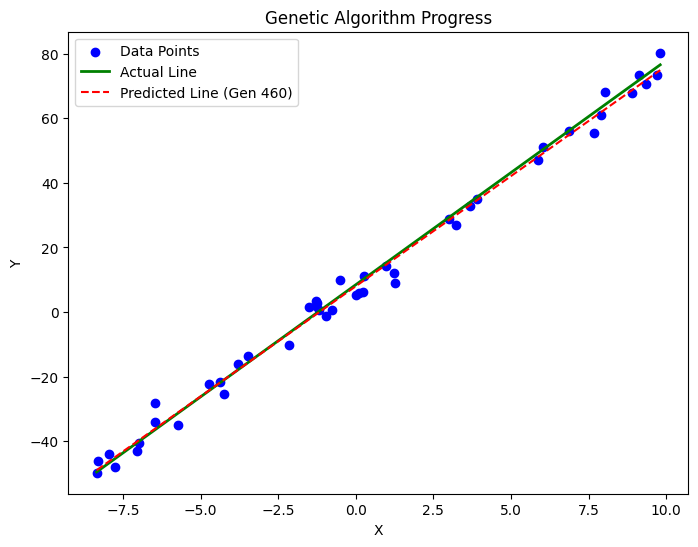

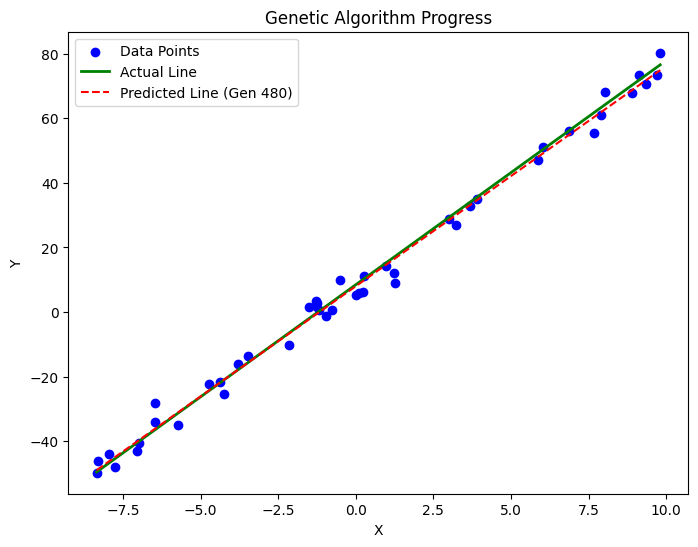

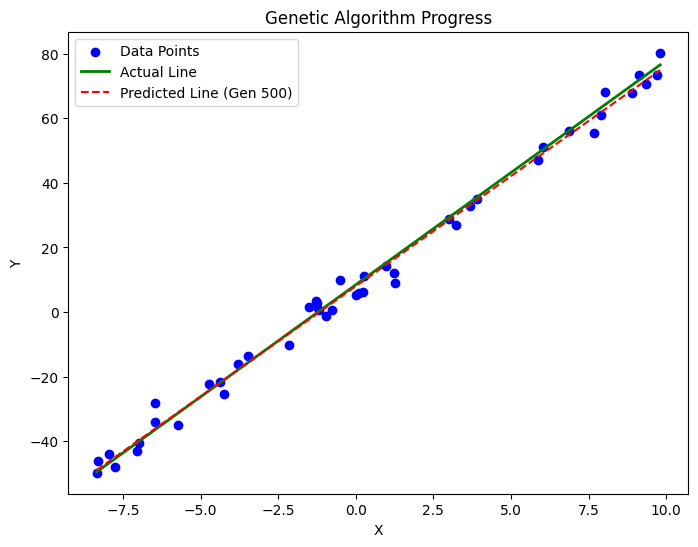

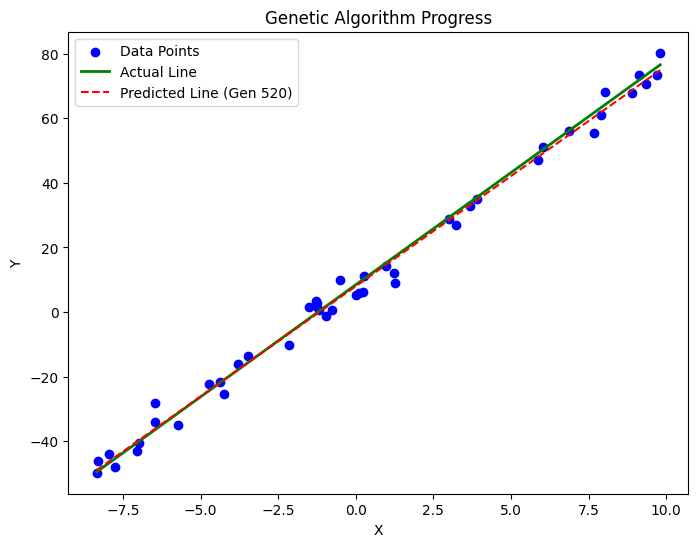

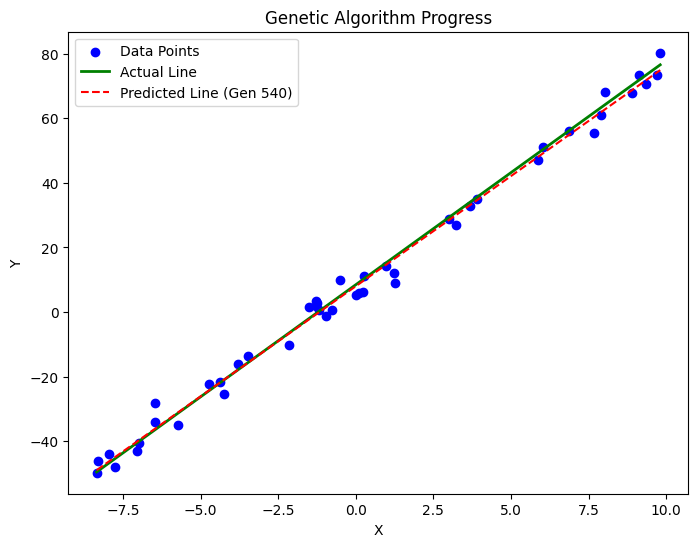

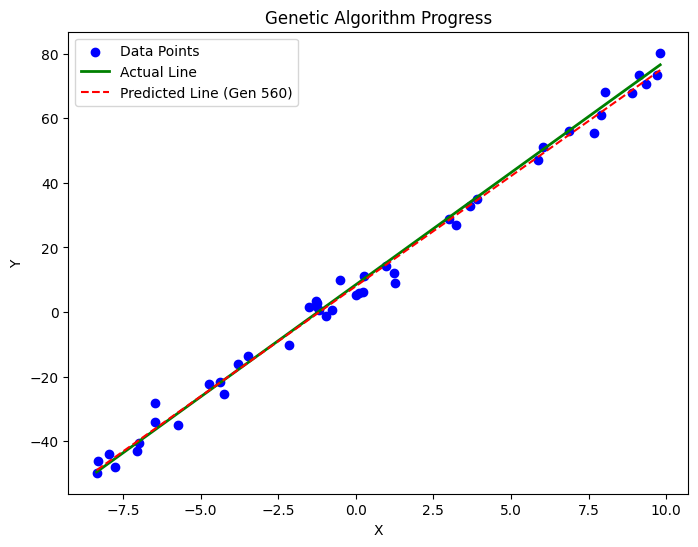

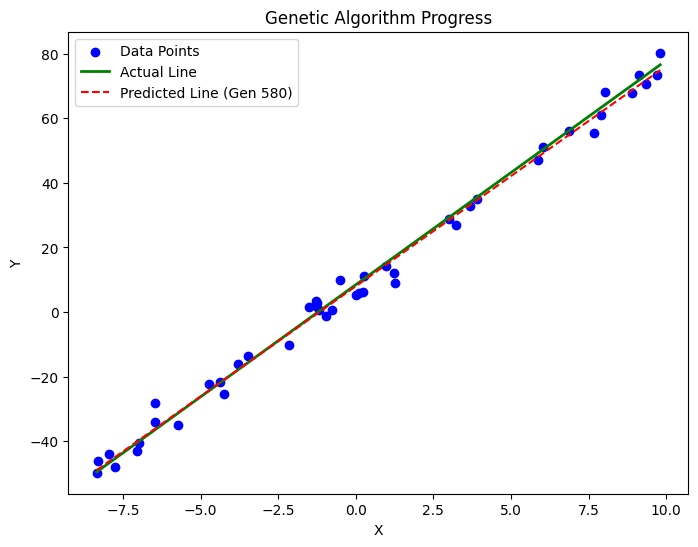

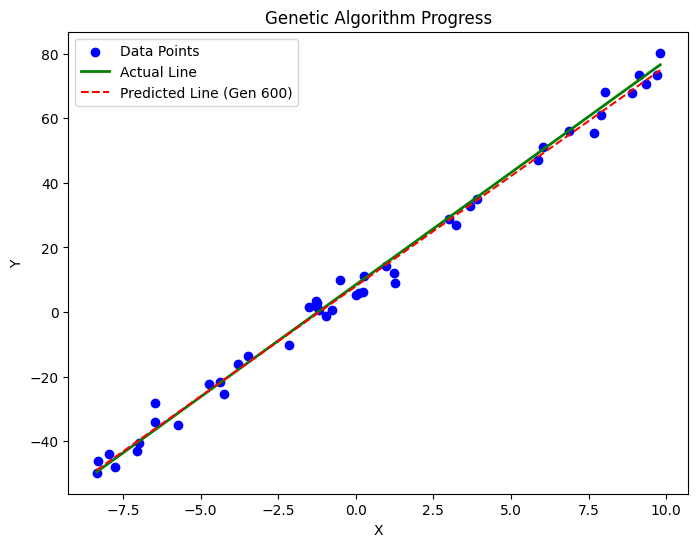

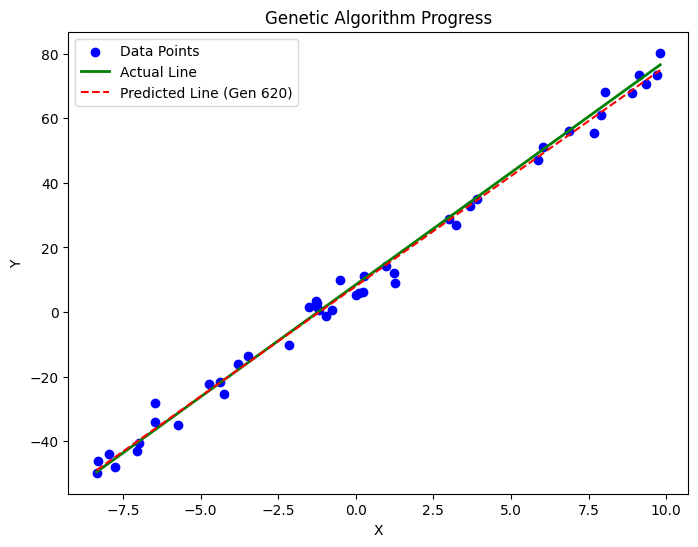

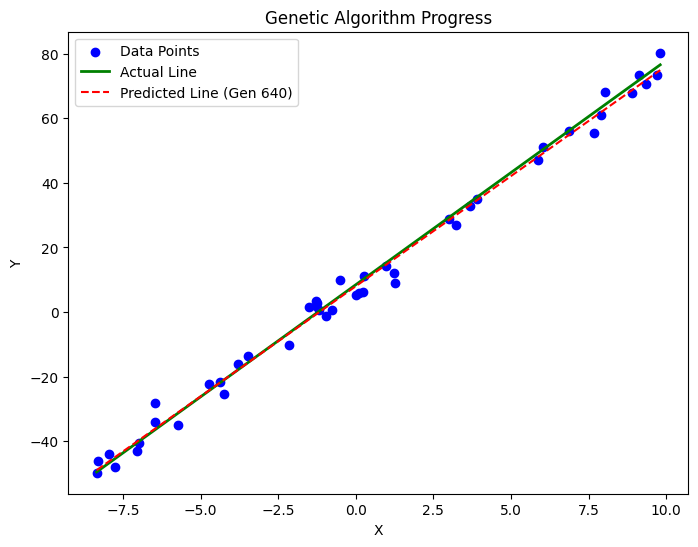

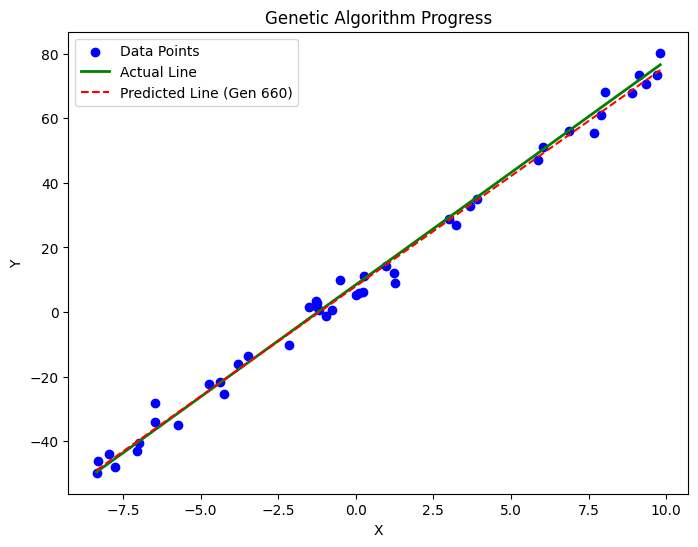

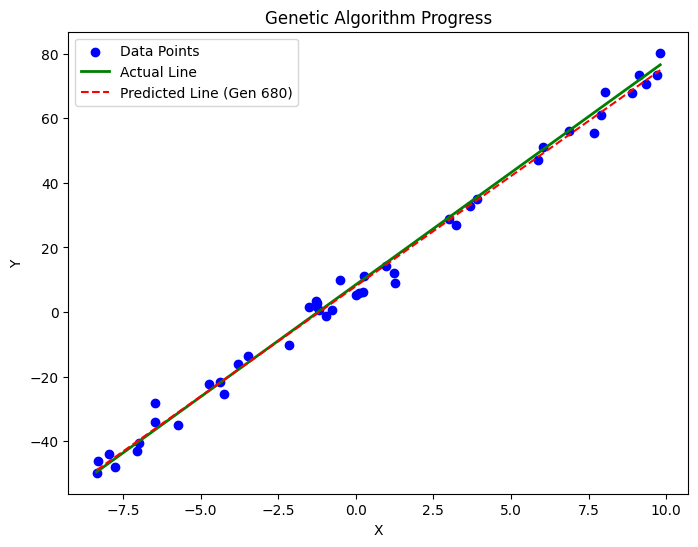

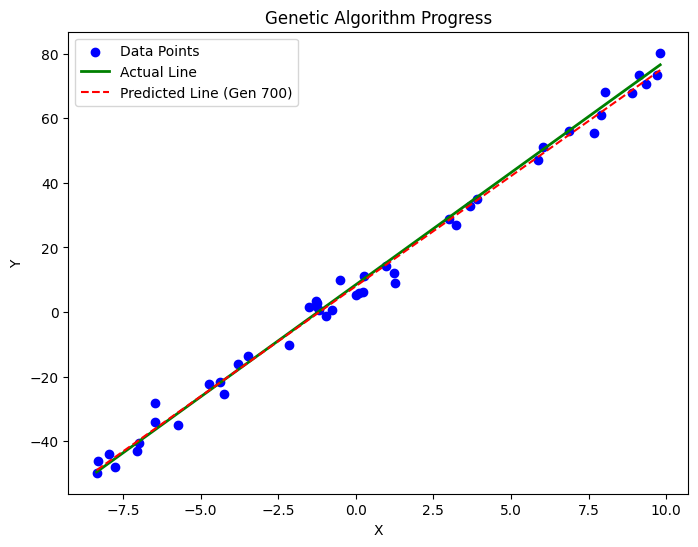

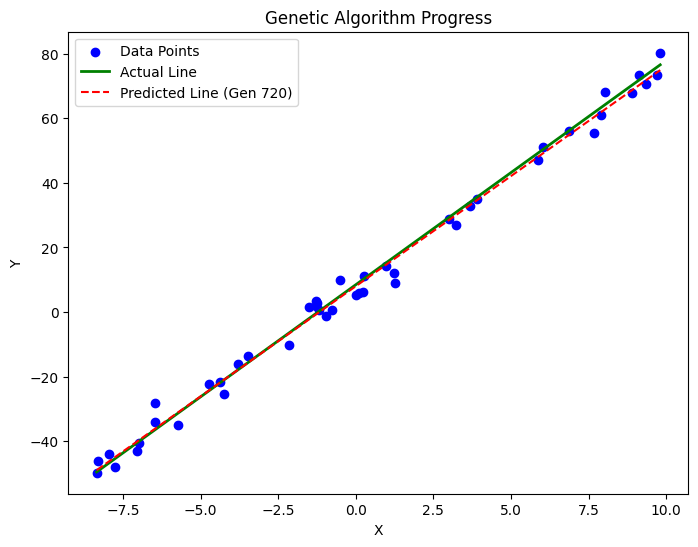

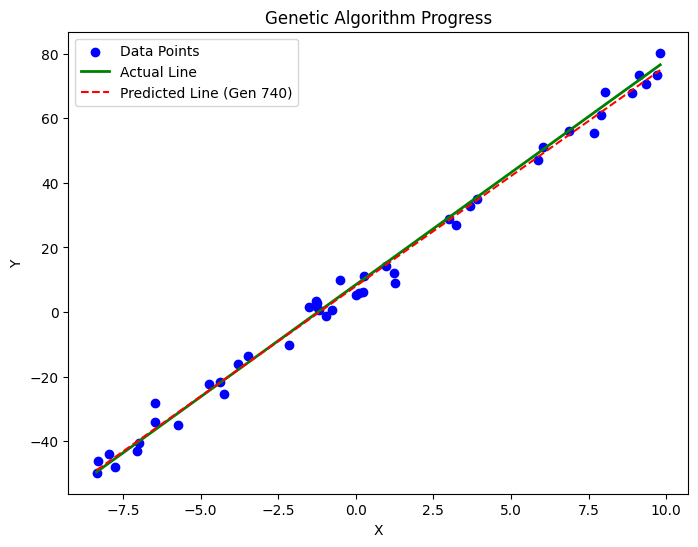

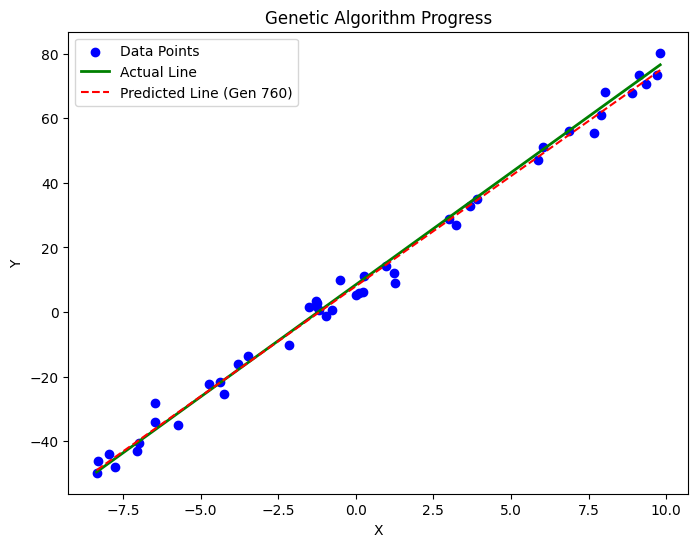

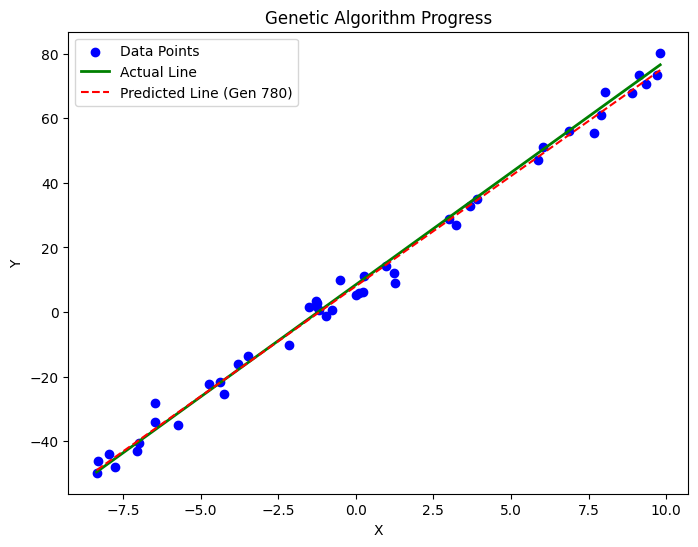

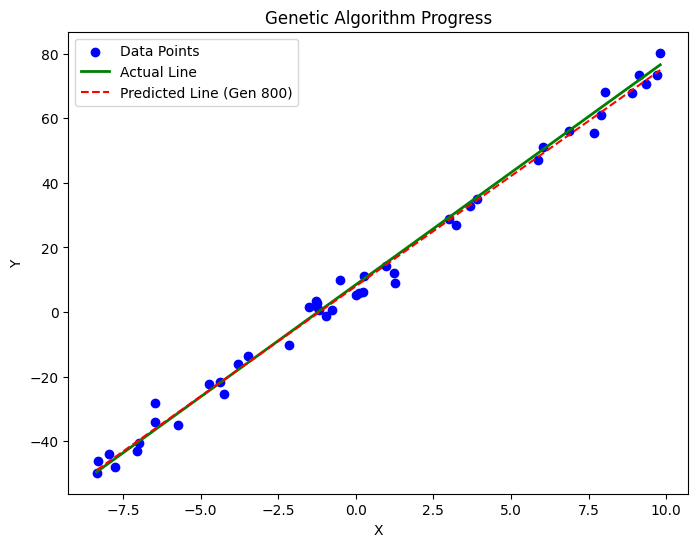

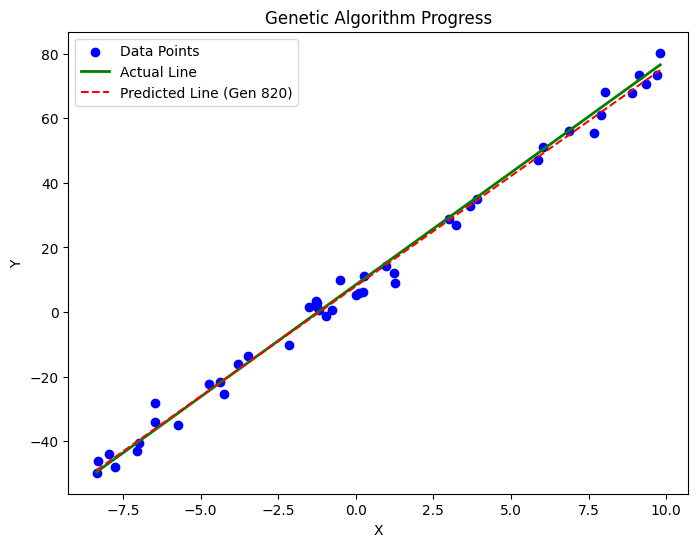

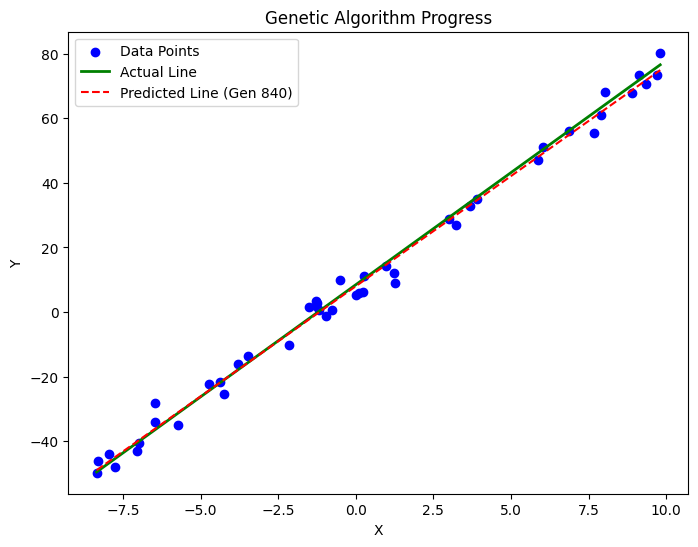

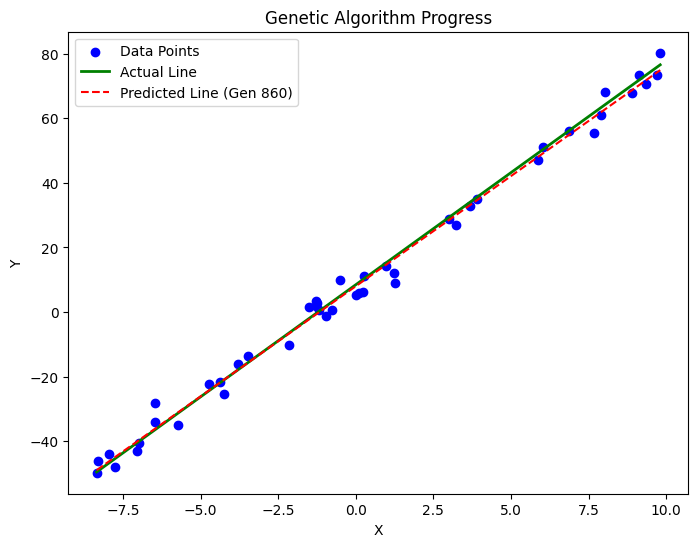

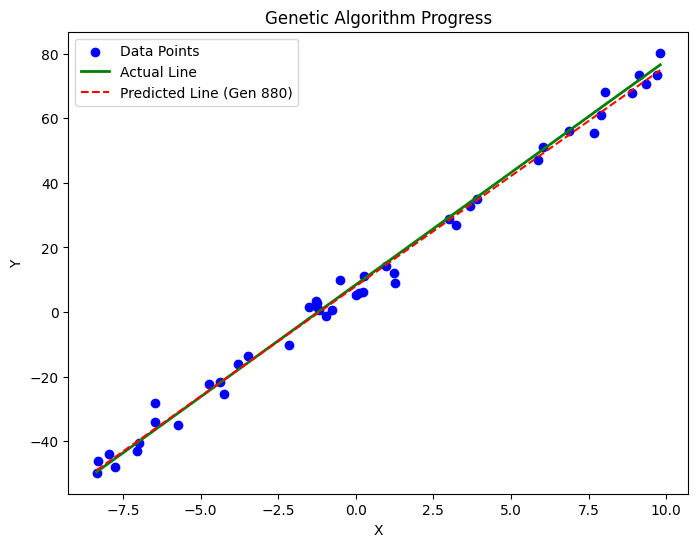

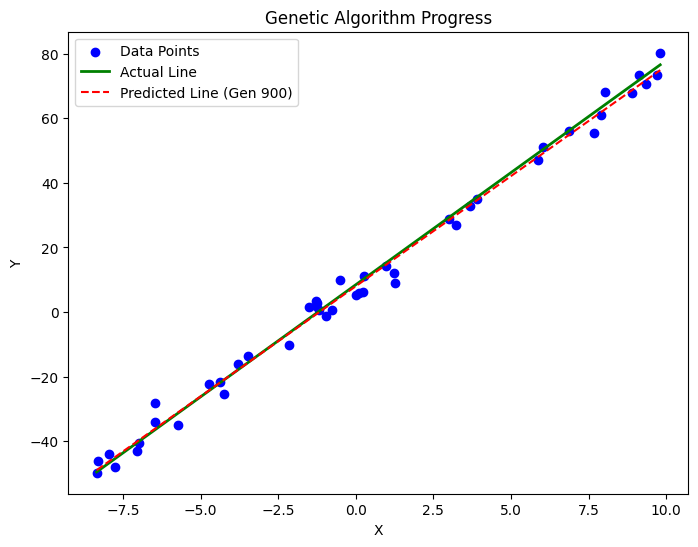

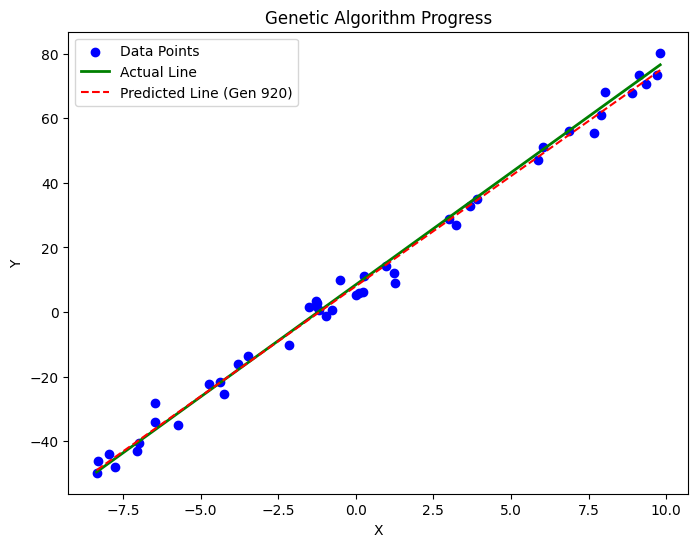

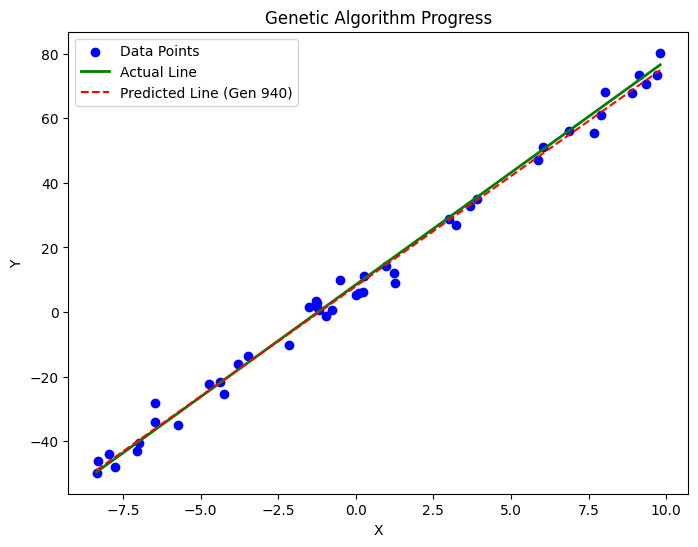

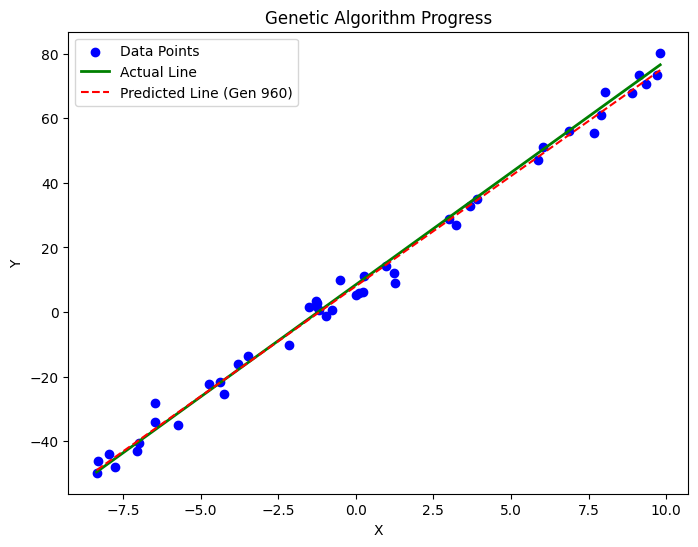

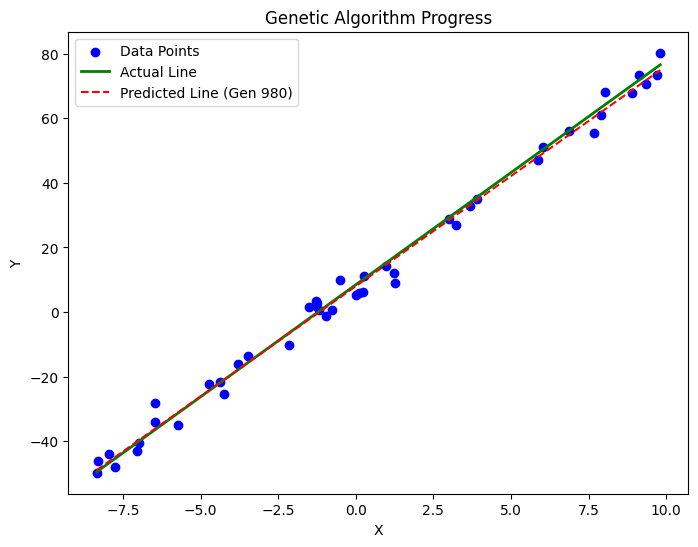

Max generations reached, stopping. Best error: 465.18252243917686


In [1236]:

# Run the algorithm
genetic_algorithm()